# DS160 Team Project- Exploratory Analysis

**Authors:** Kerry Effinger and Katie Zopff  
**Version:** 1.0  
**Semester:** Spring 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Training_set_intermediate.csv')

In [3]:
df

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


Filling in NaN values in conditions and dropping all other NaN values in the dataset:

In [4]:
df['Number_of_prev_cond'] = df['Number_of_prev_cond'].fillna(1.0)
df['A'] = df['A'].fillna(1.0)
df['B'] = df['B'].fillna(0.0)
df['C'] = df['C'].fillna(0.0)
df['D'] = df['D'].fillna(0.0)
df['E'] = df['E'].fillna(0.0)
df['F'] = df['F'].fillna(0.0)
df['Z'] = df['Z'].fillna(0.0)

In [5]:
df = df.dropna()

In [6]:
df = df.drop(columns="Z")

In [7]:
df.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Number_of_prev_cond,Survived_1_year
count,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000
mean,16536.441518,26.428002,6257.762693,33.156862,23.467172,0.903873,0.129137,0.175273,0.079189,0.372422,0.050858,1.710752,0.632040
std,9526.936580,15.022018,3593.944948,19.425696,3.772969,0.294772,0.335359,0.380209,0.270039,0.483461,0.219712,0.768248,0.482261
min,2.000000,1.000000,1.000000,0.000000,17.000336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8274.000000,13.000000,3179.000000,16.000000,20.209666,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16590.000000,26.000000,6238.000000,33.000000,23.387824,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24810.250000,39.000000,9358.250000,50.000000,26.788780,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
max,32982.000000,52.000000,12500.000000,66.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [8]:
df.dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Treated_with_drugs            object
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                object
Patient_Rural_Urban           object
Patient_mental_condition      object
A                            float64
B                            float64
C                            float64
D                            float64
E                            float64
F                            float64
Number_of_prev_cond          float64
Survived_1_year                int64
dtype: object

In [9]:
drugs = df['Treated_with_drugs'].value_counts()
drugs

DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX3 DX4                  448
DX1 DX2                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX3 DX4 DX5           24
DX1 DX2 DX3 DX4           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [10]:
smoker = df['Patient_Smoker'].value_counts()
smoker

NO     13246
YES     9838
Name: Patient_Smoker, dtype: int64

In [11]:
rural_urban = df['Patient_Rural_Urban'].value_counts()
rural_urban

RURAL    16121
URBAN     6963
Name: Patient_Rural_Urban, dtype: int64

In [12]:
mental = df['Patient_mental_condition'].value_counts()
mental

Stable    23084
Name: Patient_mental_condition, dtype: int64

In [13]:
A = df['A'].value_counts()
A

1.0    20865
0.0     2219
Name: A, dtype: int64

In [14]:
B = df['B'].value_counts()
B

0.0    20103
1.0     2981
Name: B, dtype: int64

In [15]:
C = df['C'].value_counts()
C

0.0    19038
1.0     4046
Name: C, dtype: int64

In [16]:
D = df['D'].value_counts()
D

0.0    21256
1.0     1828
Name: D, dtype: int64

In [17]:
E = df['E'].value_counts()
E

0.0    14487
1.0     8597
Name: E, dtype: int64

In [18]:
F = df['F'].value_counts()
F

0.0    21910
1.0     1174
Name: F, dtype: int64

In [19]:
survived = df['Survived_1_year'].value_counts()
survived

1    14590
0     8494
Name: Survived_1_year, dtype: int64

In [20]:
df.corr()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Number_of_prev_cond,Survived_1_year
ID_Patient_Care_Situation,1.000000,-0.005747,-0.001457,-0.004402,-0.001673,0.008101,0.004536,0.009882,-0.006648,-0.000293,0.007315,0.009550,-0.005432
Diagnosed_Condition,-0.005747,1.000000,0.010052,-0.004247,0.002631,0.002414,0.002684,-0.004094,-0.008484,0.005300,0.005087,0.001880,-0.003699
Patient_ID,-0.001457,0.010052,1.000000,0.009383,-0.017735,-0.001756,-0.012065,-0.006388,-0.004690,0.000348,0.007522,-0.008381,-0.004965
Patient_Age,-0.004402,-0.004247,0.009383,1.000000,0.009176,-0.019935,-0.010611,-0.009524,0.005370,0.000851,0.008108,-0.012252,-0.077525
Patient_Body_Mass_Index,-0.001673,0.002631,-0.017735,0.009176,1.000000,0.010557,-0.000404,-0.019742,-0.010305,-0.009015,-0.016955,-0.020041,-0.120521
A,0.008101,0.002414,-0.001756,-0.019935,0.010557,1.000000,-0.071190,-0.098596,-0.081789,-0.175887,-0.058962,0.147524,-0.042209
B,0.004536,0.002684,-0.012065,-0.010611,-0.000404,-0.071190,1.000000,-0.011038,0.004275,-0.000853,-0.010940,0.401584,-0.054406
C,0.009882,-0.004094,-0.006388,-0.009524,-0.019742,-0.098596,-0.011038,1.000000,0.015022,-0.005850,0.006861,0.455816,-0.039511
D,-0.006648,-0.008484,-0.004690,0.005370,-0.010305,-0.081789,0.004275,0.015022,1.000000,-0.000593,-0.005818,0.327382,-0.107571
E,-0.000293,0.005300,0.000348,0.000851,-0.009015,-0.175887,-0.000853,-0.005850,-0.000593,1.000000,0.004803,0.559714,0.008799


In [21]:
corr = df.corr()

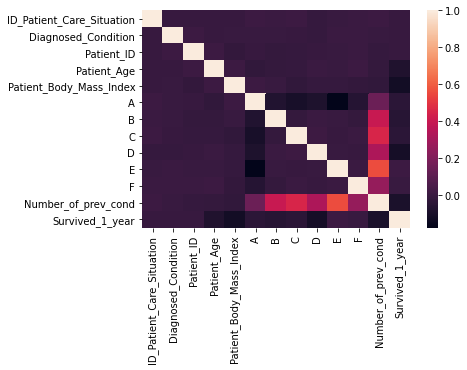

In [22]:
sns.heatmap(corr)
plt.savefig('corr_heatmap.png')

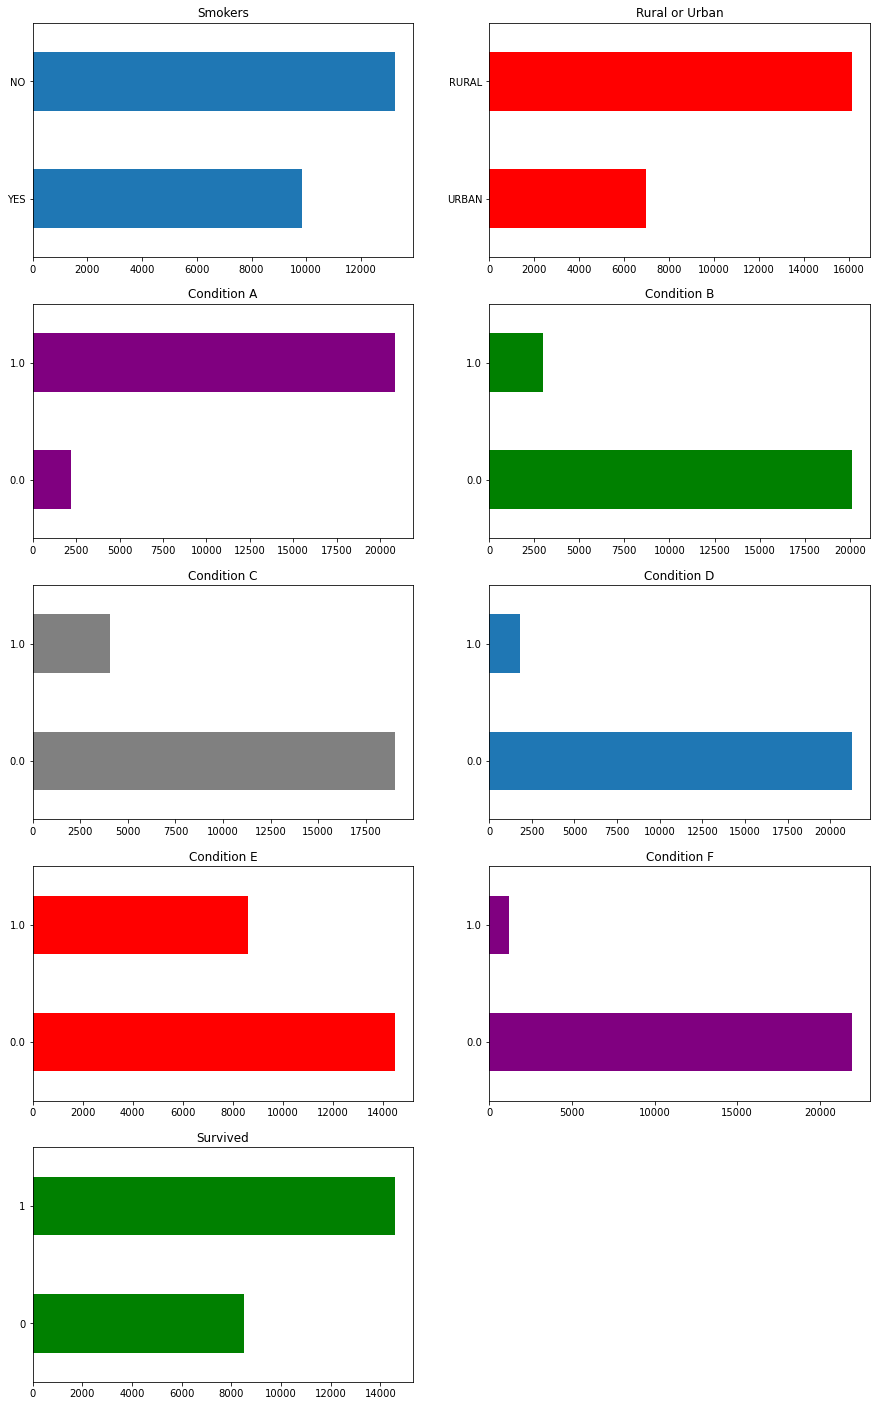

In [77]:
fig = plt.figure(figsize=(15,25))
ax1 = fig.add_subplot(5,2,1)
ax1 = smoker.sort_values().plot.barh()
ax1.set_title('Smokers')
ax2 = fig.add_subplot(5,2,2)
ax2 = rural_urban.sort_values().plot.barh(color='red')
ax2.set_title('Rural or Urban')
ax3 = fig.add_subplot(5,2,3)
ax3 = A.sort_values().plot.barh(color='purple')
ax3.set_title('Condition A')
ax4 = fig.add_subplot(5,2,4)
ax4 = B.plot.barh(color='green')
ax4.set_title('Condition B')
ax5 = fig.add_subplot(5,2,5)
ax5 = C.plot.barh(color='grey')
ax5.set_title('Condition C')
ax6 = fig.add_subplot(5,2,6)
ax6 = D.plot.barh()
ax6.set_title('Condition D')
ax7 = fig.add_subplot(5,2,7)
ax7 = E.plot.barh(color='red')
ax7.set_title('Condition E')
ax8 = fig.add_subplot(5,2,8)
ax8 = F.plot.barh(color='purple')
ax8.set_title('Condition F')
ax9 = fig.add_subplot(5,2,9)
ax9 = survived.sort_values().plot.barh(color='green')
ax9.set_title('Survived')
plt.savefig('barcharts.png')